In [1]:
import pandas as pd
import numpy as np

from datetime import datetime
import pandas as pd 

from scipy import optimize
from scipy import integrate

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

import seaborn as sns


sns.set(style="darkgrid")

mpl.rcParams['figure.figsize'] = (16, 9)
pd.set_option('display.max_rows', 500)

### Raw Dataset

In [2]:
data_path='/Users/pawnesh/ws/covid_data_science/covid_19_data_stats/data/raw/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
pd_raw=pd.read_csv(data_path)

### Processed Data

In [3]:
time_idx=pd_raw.columns[4:]


In [4]:
df_plot = pd.DataFrame({
    'date':time_idx})
df_plot.head()

,date
0,1/22/20
1,1/23/20
2,1/24/20
3,1/25/20
4,1/26/20


In [5]:
country_list=['Italy',
              'US',
              'Spain',
              'Germany',
              'Korea, South',
             ] 

In [6]:
pd_raw[pd_raw['Country/Region']=='Germany'].iloc[:,4::].sum(axis=0)[0:4]


1/22/20    0
1/23/20    0
1/24/20    0
1/25/20    0
dtype: int64

In [7]:
for each in country_list:
    df_plot[each]=np.array(pd_raw[pd_raw['Country/Region']==each].iloc[:,4::].sum(axis=0))

In [8]:
df_plot.head()

,date,Italy,US,Spain,Germany,"Korea, South"
0,1/22/20,0,1,0,0,1
1,1/23/20,0,1,0,0,1
2,1/24/20,0,2,0,0,2
3,1/25/20,0,2,0,0,2
4,1/26/20,0,5,0,0,3


In [9]:
time_idx=[datetime.strptime( each,"%m/%d/%y") for each in df_plot.date] # convert to datetime
time_str=[each.strftime('%Y-%m-%d') for each in time_idx] # convert back to date ISO norm (str)
df_plot['date']=time_idx
type(df_plot['date'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [10]:
df_plot = df_plot.rename(columns={"US": "United States", "Korea, South": "South Korea"})

In [11]:
df_plot.to_csv('/Users/pawnesh/ws/covid_data_science/covid_19_data_stats/data/processed/COVID_small_flat_table.csv',sep=';',index=False)


#### Data fetch

In [12]:

df_analyse=pd.read_csv('/Users/pawnesh/ws/covid_data_science/covid_19_data_stats/data/processed/COVID_small_flat_table.csv',sep=';')  
df_analyse.sort_values('date',ascending=True)

,date,Italy,United States,Spain,Germany,South Korea
0,2020-01-22,0,1,0,0,1
1,2020-01-23,0,1,0,0,1
2,2020-01-24,0,2,0,0,2
3,2020-01-25,0,2,0,0,2
4,2020-01-26,0,5,0,0,3
...,...,...,...,...,...,...
908,2022-07-18,20177910,89712243,13090476,29853680,18861593
909,2022-07-19,20299013,89830497,13132159,29994679,18937971
910,2022-07-20,20385814,90046261,13132159,30131303,19009080
911,2022-07-21,20467349,90200438,13132159,30239122,19077659


In [14]:
### Param Config

In [15]:
# set some basic parameters
# beta/gamma is denoted as  'basic reproduction number'

N0=1000000 #max susceptible population
beta=0.4   # infection spread dynamics
gamma=0.1  # recovery rate

## beta/gamma is the basic reproduction number, <1 means no spread virus


# condition I0+S0+R0=N0
I0=df_analyse.Germany[35]
S0=N0-I0
R0=0

In [16]:
def SIR_model(SIR,beta,gamma):
    ''' Simple SIR model
        S: susceptible population
        I: infected people
        R: recovered people
        beta: 
        
        overall condition is that the sum of changes (differnces) sum up to 0
        dS+dI+dR=0
        S+I+R= N (constant size of population)
    
    '''
    
    S,I,R=SIR
    dS_dt=-beta*S*I/N0          #S*I is the 
    dI_dt=beta*S*I/N0-gamma*I
    dR_dt=gamma*I
    return([dS_dt,dI_dt,dR_dt])

In [17]:
## Simulative approach to calculate SIR curves


In [18]:
SIR=np.array([S0,I0,R0])
propagation_rates=pd.DataFrame(columns={'susceptible':S0,
                                        'infected':I0,
                                        'recoverd':R0})



for each_t in np.arange(100):
   
    new_delta_vec=SIR_model(SIR,beta,gamma)
   
    SIR=SIR+new_delta_vec
    
    propagation_rates=propagation_rates.append({'susceptible':SIR[0],
                                                'infected':SIR[1],
                                                'recovered':SIR[2]}, ignore_index=True)

/var/folders/pc/8kg875y95hbg4w1gyj56tvym0000gn/T/ipykernel_49126/3252408798.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  propagation_rates=propagation_rates.append({'susceptible':SIR[0],
/var/folders/pc/8kg875y95hbg4w1gyj56tvym0000gn/T/ipykernel_49126/3252408798.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  propagation_rates=propagation_rates.append({'susceptible':SIR[0],
/var/folders/pc/8kg875y95hbg4w1gyj56tvym0000gn/T/ipykernel_49126/3252408798.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  propagation_rates=propagation_rates.append({'susceptible':SIR[0],
/var/folders/pc/8kg875y95hbg4w1gyj56tvym0000gn/T/ipykernel_49126/3252408798.py:14: FutureWarning: The frame.append method is deprecated and will be 

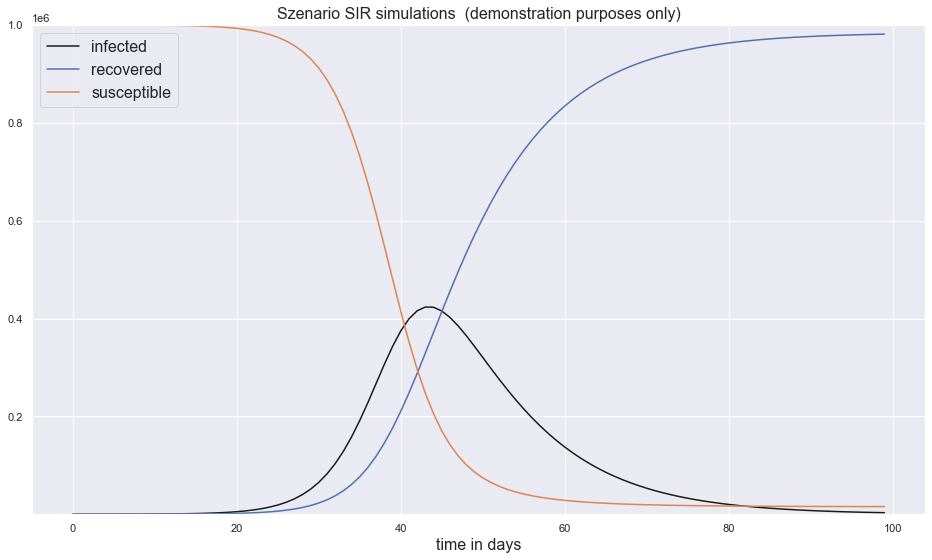

In [99]:
fig, ax1 = plt.subplots(1, 1)

ax1.plot(propagation_rates.index,propagation_rates.infected,label='infected',color='k')
ax1.plot(propagation_rates.index,propagation_rates.recovered,label='recovered')
ax1.plot(propagation_rates.index,propagation_rates.susceptible,label='susceptible')

ax1.set_ylim(10, 1000000)
ax1.set_yscale('linear')
ax1.set_title('Szenario SIR simulations  (demonstration purposes only)',size=16)
ax1.set_xlabel('time in days',size=16)
ax1.legend(loc='best',
           prop={'size': 16});

### Fitting data to a model

#### step one: always start on simulative / constructive data

Goal is to fit a data model (SIR) model to obtain the parameters beta and gamma

step one: always start on simulative / constructive data step two: cross check if the innerlogic of your parameter fitting is correct



In [19]:
def SIR_model_t(SIR,t,beta,gamma):
    ''' Simple SIR model
        S: susceptible population
        t: time step, mandatory for integral.odeint
        I: infected people
        R: recovered people
        beta: 
        
        overall condition is that the sum of changes (differnces) sum up to 0
        dS+dI+dR=0
        S+I+R= N (constant size of population)
    
    '''
    
    S,I,R=SIR
    dS_dt=-beta*S*I/N0          #S*I is the 
    dI_dt=beta*S*I/N0-gamma*I
    dR_dt=gamma*I
    return dS_dt,dI_dt,dR_dt

In [20]:
# the resulting curve has to be fitted
# free parameters are here beta and gamma

def fit_odeint(x, beta, gamma):
    '''
    helper function for the integration
    '''
    return integrate.odeint(SIR_model_t, (S0, I0, R0), t, args=(beta, gamma))[:,1] # we only would like to get dI

In [21]:
# fit the data set ydata, here the simulative data set of the infected curve

ydata = propagation_rates.infected
t=np.arange(len(ydata))

In [22]:
popt, pcov = optimize.curve_fit(fit_odeint, t, ydata)
perr = np.sqrt(np.diag(pcov))
    
print('standard deviation errors : ',str(perr), ' start infect:',ydata[0])
print("Optimal parameters: beta =", popt[0], " and gamma = ", popt[1])

standard deviation errors :  [0.00087012 0.00074078]  start infect: 27.299823600000003
Optimal parameters: beta = 0.37337770412678917  and gamma =  0.09619930076608822


/var/folders/pc/8kg875y95hbg4w1gyj56tvym0000gn/T/ipykernel_49126/649699423.py:16: RuntimeWarning: overflow encountered in double_scalars
  dS_dt=-beta*S*I/N0          #S*I is the
/var/folders/pc/8kg875y95hbg4w1gyj56tvym0000gn/T/ipykernel_49126/649699423.py:17: RuntimeWarning: overflow encountered in double_scalars
  dI_dt=beta*S*I/N0-gamma*I
/var/folders/pc/8kg875y95hbg4w1gyj56tvym0000gn/T/ipykernel_49126/649699423.py:17: RuntimeWarning: invalid value encountered in double_scalars
  dI_dt=beta*S*I/N0-gamma*I


In [23]:
# get the final fitted curve
fitted=fit_odeint(t, *popt)

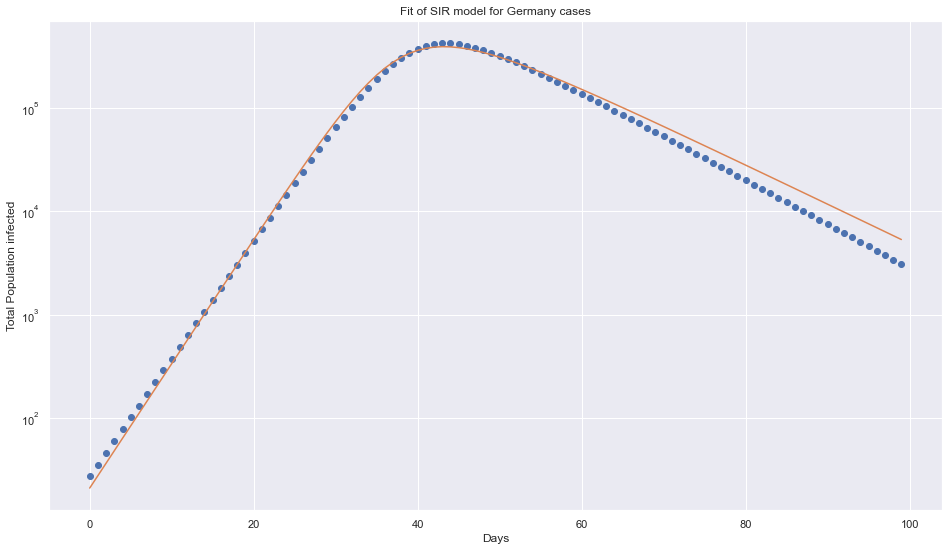

Optimal parameters: beta = 0.37337770412678917  and gamma =  0.09619930076608822
Basic Reproduction Number R0  3.881293327013565
This ratio is derived as the expected number of new infections (these new infections are sometimes called secondary infections from a single infection in a population where all subjects are susceptible. @wiki


In [24]:
plt.semilogy(t, ydata, 'o')
plt.semilogy(t, fitted)
#plt.semilogy(fitted)

plt.title("Fit of SIR model for Germany cases")
plt.ylabel("Total Population infected")
plt.xlabel("Days")
plt.show()
print("Optimal parameters: beta =", popt[0], " and gamma = ", popt[1])
print("Basic Reproduction Number R0 " , popt[0]/ popt[1])
print("This ratio is derived as the expected number of new infections (these new infections are sometimes called secondary infections from a single infection in a population where all subjects are susceptible. @wiki")


In [13]:
df_analyse

,date,Italy,United States,Spain,Germany,South Korea
0,2020-01-22,0,1,0,0,1
1,2020-01-23,0,1,0,0,1
2,2020-01-24,0,2,0,0,2
3,2020-01-25,0,2,0,0,2
4,2020-01-26,0,5,0,0,3
...,...,...,...,...,...,...
908,2022-07-18,20177910,89712243,13090476,29853680,18861593
909,2022-07-19,20299013,89830497,13132159,29994679,18937971
910,2022-07-20,20385814,90046261,13132159,30131303,19009080
911,2022-07-21,20467349,90200438,13132159,30239122,19077659


### Fitting the parameters of SIR model


the SIR model is assuming a very simplistic curve however we can find situations (time windows) where the model might apply



In [68]:
import pandas as pd
results = pd.DataFrame({})

In [69]:
def SIR_model_t(SIR,t,beta,gamma):
    ''' Simple SIR model
        S: susceptible population
        t: time step, mandatory for integral.odeint
        I: infected people
        R: recovered people
        beta: 
        
        overall condition is that the sum of changes (differnces) sum up to 0
        dS+dI+dR=0
        S+I+R= N (constant size of population)
    
    '''
    
    S,I,R=SIR
    dS_dt=-beta*S*I/N0          #S*I is the 
    dI_dt=beta*S*I/N0-gamma*I
    dR_dt=gamma*I
    return dS_dt,dI_dt,dR_dt

In [70]:
# the resulting curve has to be fitted
# free parameters are here beta and gamma

def fit_odeint(x, beta, gamma):
    '''
    helper function for the integration
    '''
    return integrate.odeint(SIR_model_t, (S0, I0, R0), t, args=(beta, gamma))[:,1] # we only would like to get dI

In [85]:
## slice out some true data of a country
selected_countries = ["Germany", "Italy", "United States"]
N0, S0, I0, R0 = None, None, None, None

def initialization(country_name, data_start, data_end):
    global N0, S0, I0, R0
    ydata = np.array(df_analyse[country_name][data_start:data_end])
    t=np.arange(len(ydata))
    # ensure re-initialization 
    # attenion when slicing gout only a time window 
    # (one Corana wave) the overall N0 is not the full popoulation size 
    N0=N0

    I0=ydata[0]
    S0=N0-I0
    R0=0
    print('start infected:',I0)
    print('cumulative sum of invected after period',ydata[-1])
    print('Number of days',len(ydata))
    print('N0',N0)
    return ydata, t


In [86]:
def fit(t, ydata):
    ## get the model parameters / fit the model
    popt, pcov = optimize.curve_fit(fit_odeint, t, ydata)
    perr = np.sqrt(np.diag(pcov))

    print('standard deviation errors : ',str(perr), ' start infect:',ydata[0])
    print("Optimal parameters: beta =", popt[0], " and gamma = ", popt[1])

    # get the final fitted curve / predict the outcome 
    fitted=fit_odeint(t, *popt)
    return fitted, popt

In [87]:
def plot_model(ydata, fitted, t, popt, country):
    # option 1: ydata is cummulative, thus we need cumulative fitted line
    #plt.semilogy(t, ydata, 'o') 
    #plt.semilogy(t, np.cumsum(fitted))

    # option2: ydata is cummulative, however we would like to have the day to day difference
    plt.semilogy(t,np.ediff1d(ydata, to_begin=ydata[1]-ydata[0]), 'o')
    plt.semilogy(t, fitted)

    plt.title(f"Fit of SIR model for {country} cases")
    plt.ylabel("New Population infected")
    plt.xlabel("Days")
    plt.show()
    print("Optimal parameters: beta =", popt[0], " and gamma = ", popt[1])
    print("Basic Reproduction Number R0 " , popt[0]/ popt[1])
    print("This ratio is derived as the expected number of new infections (these new infections are sometimes called secondary infections from a single infection in a population where all subjects are susceptible. @wiki")


### Germany

start infected: 16
cumulative sum of invected after period 188534
Number of days 130
N0 500000
standard deviation errors :  [9.9780484  9.34694801]  start infect: 16
Optimal parameters: beta = 1.0053259703761892  and gamma =  0.898804317266253


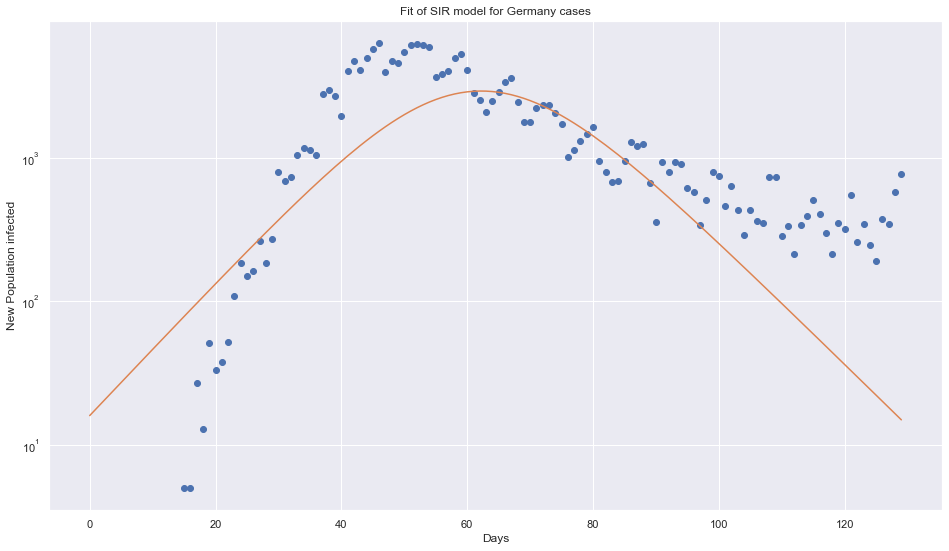

Optimal parameters: beta = 1.0053259703761892  and gamma =  0.898804317266253
Basic Reproduction Number R0  1.1185148436246122
This ratio is derived as the expected number of new infections (these new infections are sometimes called secondary infections from a single infection in a population where all subjects are susceptible. @wiki


In [95]:
selected_country = "Germany"
data_selection_range = (20, 150)
N0 = 500000

ydata, t = initialization(selected_country, data_selection_range[0], data_selection_range[1])
#print(ydata)
fitted, popt = fit(t, ydata)
plot_model(ydata, fitted, t, popt, selected_country)
results[f"{selected_country}"] = t
results[f"{selected_country}__infections"] = np.ediff1d(ydata, to_begin=ydata[1]-ydata[0])
results[f"{selected_country}__fitted"] = fitted

### Italy

start infected: 20
cumulative sum of invected after period 240436
Number of days 130
N0 48000000
standard deviation errors :  [0.02786219 0.02790586]  start infect: 20
Optimal parameters: beta = 0.9599446378362091  and gamma =  0.8513007220570336


/var/folders/pc/8kg875y95hbg4w1gyj56tvym0000gn/T/ipykernel_49372/649699423.py:16: RuntimeWarning: overflow encountered in double_scalars
  dS_dt=-beta*S*I/N0          #S*I is the
/var/folders/pc/8kg875y95hbg4w1gyj56tvym0000gn/T/ipykernel_49372/649699423.py:17: RuntimeWarning: overflow encountered in double_scalars
  dI_dt=beta*S*I/N0-gamma*I
/var/folders/pc/8kg875y95hbg4w1gyj56tvym0000gn/T/ipykernel_49372/649699423.py:18: RuntimeWarning: overflow encountered in double_scalars
  dR_dt=gamma*I


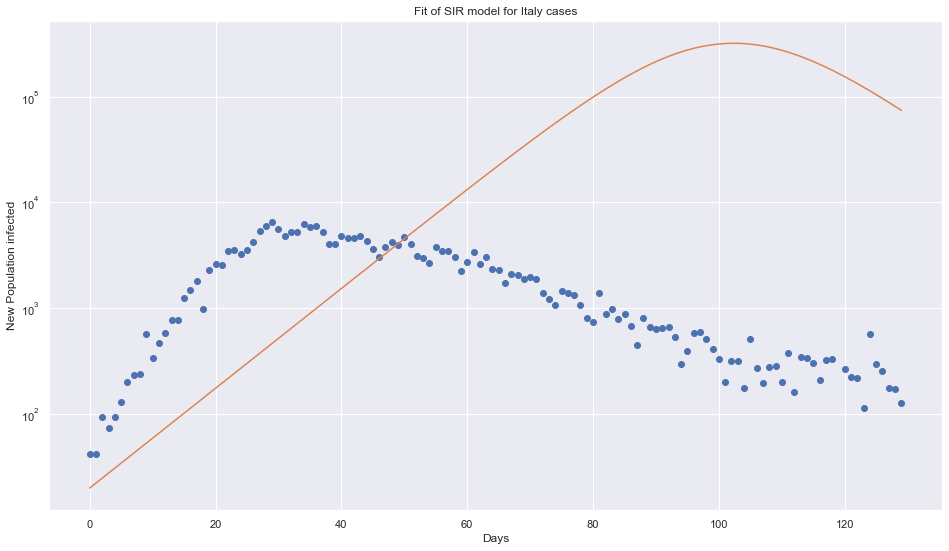

Optimal parameters: beta = 0.9599446378362091  and gamma =  0.8513007220570336
Basic Reproduction Number R0  1.1276210779155158
This ratio is derived as the expected number of new infections (these new infections are sometimes called secondary infections from a single infection in a population where all subjects are susceptible. @wiki


In [96]:
selected_country = "Italy"
data_selection_range = (30, 160)
N0 = 48000000

ydata, t = initialization(selected_country, data_selection_range[0], data_selection_range[1])
#print(ydata)
fitted, popt = fit(t, ydata)
plot_model(ydata, fitted, t, popt, selected_country)
results[f"{selected_country}"] = t
results[f"{selected_country}__infections"] = np.ediff1d(ydata, to_begin=ydata[1]-ydata[0])
results[f"{selected_country}__fitted"] = fitted

### United States

start infected: 16
cumulative sum of invected after period 2595272
Number of days 130
N0 440000000
standard deviation errors :  [0.02635216 0.0263403 ]  start infect: 16
Optimal parameters: beta = 1.1007474593737407  and gamma =  0.9811866826570208


/var/folders/pc/8kg875y95hbg4w1gyj56tvym0000gn/T/ipykernel_49372/649699423.py:16: RuntimeWarning: overflow encountered in double_scalars
  dS_dt=-beta*S*I/N0          #S*I is the
/var/folders/pc/8kg875y95hbg4w1gyj56tvym0000gn/T/ipykernel_49372/649699423.py:17: RuntimeWarning: overflow encountered in double_scalars
  dI_dt=beta*S*I/N0-gamma*I


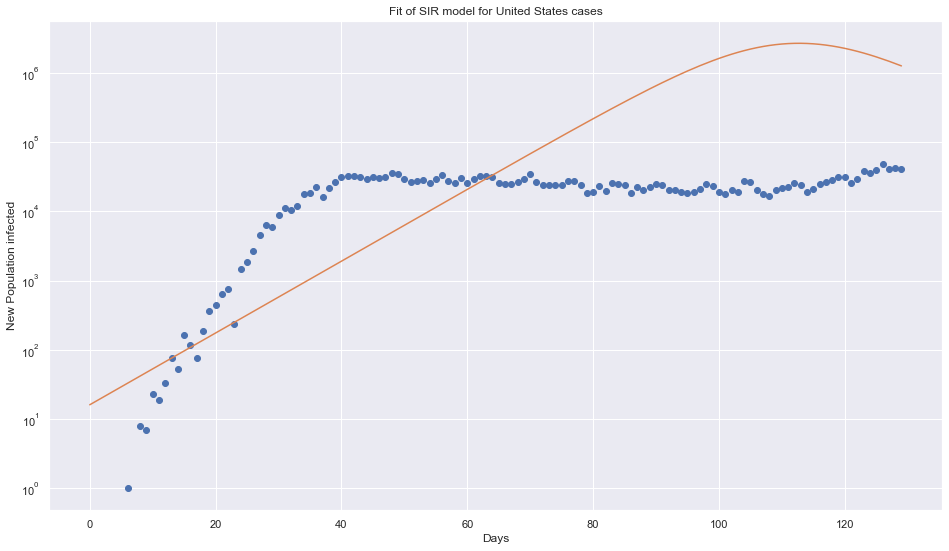

Optimal parameters: beta = 1.1007474593737407  and gamma =  0.9811866826570208
Basic Reproduction Number R0  1.12185324039759
This ratio is derived as the expected number of new infections (these new infections are sometimes called secondary infections from a single infection in a population where all subjects are susceptible. @wiki


In [97]:
selected_country = "United States"
data_selection_range = (30, 160)
N0 = 440000000

ydata, t = initialization(selected_country, data_selection_range[0], data_selection_range[1])
#print(ydata)
fitted, popt = fit(t, ydata)
plot_model(ydata, fitted, t, popt, selected_country)
results[f"{selected_country}"] = t
results[f"{selected_country}__infections"] = np.ediff1d(ydata, to_begin=ydata[1]-ydata[0])
results[f"{selected_country}__fitted"] = fitted

In [98]:
results.to_csv("/Users/pawnesh/ws/covid_data_science/covid_19_data_stats/data/processed/sir_data.csv",sep=";", index=False)

In [99]:
results

,Germany,Germany__infections,Germany__fitted,Italy,Italy__infections,Italy__fitted,United States,United States__infections,United States__fitted
0,0,0,16.000000,0,42,20.000000,0,0,1.600000e+01
1,1,0,17.797561,1,42,22.295293,1,0,1.803203e+01
2,2,0,19.796362,2,93,24.853994,2,0,2.032212e+01
3,3,0,22.018760,3,74,27.706330,3,0,2.290306e+01
4,4,0,24.489561,4,93,30.885993,4,0,2.581179e+01
5,5,0,27.236270,5,131,34.430543,5,0,2.908992e+01
6,6,0,30.289376,6,202,38.381849,6,1,3.278438e+01
7,7,0,33.682663,7,233,42.786583,7,0,3.694803e+01
8,8,0,37.453545,8,240,47.696768,8,8,4.164047e+01
9,9,0,41.643435,9,566,53.170396,9,7,4.692885e+01
